 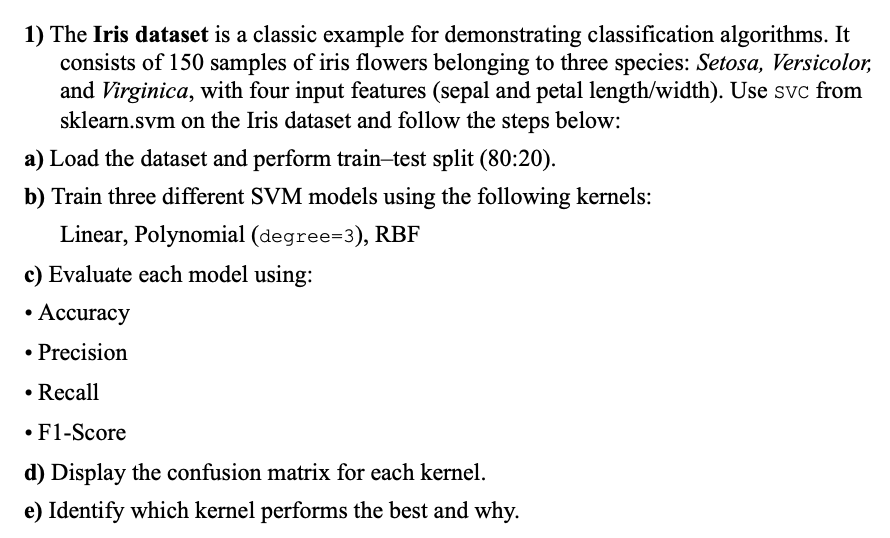

In [1]:
import numpy as np
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)


iris = load_iris()
X_iris = iris.data
y_iris = iris.target
class_names_iris = iris.target_names

X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(
    X_iris,
    y_iris,
    test_size=0.20,
    random_state=42,
    stratify=y_iris
)

print("Training samples :", X_train_i.shape[0])
print("Testing samples  :", X_test_i.shape[0])

svm_models = {
    "Linear": SVC(kernel="linear", random_state=0),
    "Polynomial (deg=3)": SVC(kernel="poly", degree=3, random_state=0),
    "RBF": SVC(kernel="rbf", random_state=0)
}

results_q1 = {}

for name, model in svm_models.items():
    print(f"--> Training SVM with {name} kernel")
    model.fit(X_train_i, y_train_i)
    y_pred = model.predict(X_test_i)

    acc = accuracy_score(y_test_i, y_pred)
    prec = precision_score(y_test_i, y_pred, average="weighted")
    rec = recall_score(y_test_i, y_pred, average="weighted")
    f1 = f1_score(y_test_i, y_pred, average="weighted")

    results_q1[name] = (acc, prec, rec, f1)

    print("Q1 (c)  Evaluation on test set:")
    print("  Accuracy :", round(acc, 4))
    print("  Precision:", round(prec, 4))
    print("  Recall   :", round(rec, 4))
    print("  F1-score :", round(f1, 4))

    print("\nQ1 (d)  Confusion matrix (rows: true, cols: predicted):")
    cm = confusion_matrix(y_test_i, y_pred)
    print(cm)
    print("\nClassification report:")
    print(classification_report(y_test_i, y_pred, target_names=class_names_iris))
    print("--------------------------------------------------------\n")

print("Q1 (e)  Comparing kernels based on Accuracy / F1-score:\n")

for name, (acc, prec, rec, f1) in results_q1.items():
    print(f"{name:20s} -> Acc: {acc:.4f}, F1: {f1:.4f}")

best_kernel = max(results_q1.items(), key=lambda x: (x[1][0], x[1][3]))[0]
best_acc, _, _, best_f1 = results_q1[best_kernel]

print(f"\nBest performing kernel on this split: {best_kernel}")
print(f"Reason (observed): it achieved highest accuracy ({best_acc:.4f}) "
      f"and F1-score ({best_f1:.4f}).")
print("Usually, RBF handles non-linear class boundaries well,")
print("while Linear can work nicely if the classes are almost linearly separable.")
print("On the Iris dataset, either Linear or RBF typically wins depending on the split.\n")


Training samples : 120
Testing samples  : 30
--> Training SVM with Linear kernel
Q1 (c)  Evaluation on test set:
  Accuracy : 1.0
  Precision: 1.0
  Recall   : 1.0
  F1-score : 1.0

Q1 (d)  Confusion matrix (rows: true, cols: predicted):
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]

Classification report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

--------------------------------------------------------

--> Training SVM with Polynomial (deg=3) kernel
Q1 (c)  Evaluation on test set:
  Accuracy : 0.9667
  Precision: 0.9697
  Recall   : 0.9667
  F1-score : 0.9666

Q1 (d)  Confusion matrix (rows: true, cols: predicted):
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]

Classif

In [2]:

bc = load_breast_cancer()
X_bc = bc.data
y_bc = bc.target
class_names_bc = bc.target_names

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(
    X_bc,
    y_bc,
    test_size=0.20,
    random_state=42,
    stratify=y_bc
)

print("Training samples :", X_train_b.shape[0])
print("Testing samples  :", X_test_b.shape[0])

print("\nRBF SVM WITHOUT feature scaling\n")

svm_no_scaling = SVC(kernel="rbf", random_state=0)

svm_no_scaling.fit(X_train_b, y_train_b)

y_train_pred_no = svm_no_scaling.predict(X_train_b)
y_test_pred_no = svm_no_scaling.predict(X_test_b)

train_acc_no = accuracy_score(y_train_b, y_train_pred_no)
test_acc_no = accuracy_score(y_test_b, y_test_pred_no)

print("RBF SVM (no scaling)")
print("  Training accuracy:", round(train_acc_no, 4))
print("  Testing  accuracy:", round(test_acc_no, 4))


print("\nRBF SVM WITH feature scaling \n")

svm_with_scaling = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="rbf", random_state=0))
])

svm_with_scaling.fit(X_train_b, y_train_b)

y_train_pred_sc = svm_with_scaling.predict(X_train_b)
y_test_pred_sc = svm_with_scaling.predict(X_test_b)

train_acc_sc = accuracy_score(y_train_b, y_train_pred_sc)
test_acc_sc = accuracy_score(y_test_b, y_test_pred_sc)

print("RBF SVM (with StandardScaler)")
print("  Training accuracy:", round(train_acc_sc, 4))
print("  Testing  accuracy:", round(test_acc_sc, 4))

print(f"  Without scaling -> train: {train_acc_no:.4f}, test: {test_acc_no:.4f}")
print(f"  With scaling    -> train: {train_acc_sc:.4f}, test: {test_acc_sc:.4f}")

print("\nDiscussion\n")

print("SVM with RBF kernel is distance-based (it uses ||x - x_i|| inside the kernel).")
print("If some features have much larger numeric range than others,")
print("those big-range features dominate the distance calculation.")
print("After applying StandardScaler, all features have mean ≈ 0 and variance ≈ 1,")
print("so each attribute contributes more fairly.")
print("This usually leads to:")
print("  * more stable training,")
print("  * better generalisation on the test set, and")
print("  * a cleaner decision boundary in high-dimensional space.")
print("You can see this effect by comparing the testing accuracy with and without scaling above.\n")


Training samples : 455
Testing samples  : 114

RBF SVM WITHOUT feature scaling

RBF SVM (no scaling)
  Training accuracy: 0.9187
  Testing  accuracy: 0.9298

RBF SVM WITH feature scaling 

RBF SVM (with StandardScaler)
  Training accuracy: 0.9824
  Testing  accuracy: 0.9825
  Without scaling -> train: 0.9187, test: 0.9298
  With scaling    -> train: 0.9824, test: 0.9825

Discussion

SVM with RBF kernel is distance-based (it uses ||x - x_i|| inside the kernel).
If some features have much larger numeric range than others,
those big-range features dominate the distance calculation.
After applying StandardScaler, all features have mean ≈ 0 and variance ≈ 1,
so each attribute contributes more fairly.
This usually leads to:
  * more stable training,
  * better generalisation on the test set, and
  * a cleaner decision boundary in high-dimensional space.
You can see this effect by comparing the testing accuracy with and without scaling above.

